**Project by
Aryak Bodkhe [J005]
Sudhanshu Gupta[J066] ***

In [50]:
#Project by Aryak Bodkhe [J005] Sudhanshu Gupta[J066]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diamonds-m.csv to diamonds-m.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from decimal import Decimal 
import re as re
import math
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['diamonds-m.csv']))

**What  is structure of the dataset.** 


In [ ]:
df2.describe()

,id,carat,depth,table,price,x,y,z
count,53940.000000,53938.000000,53940.000000,53940.000000,53936.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797947,61.749405,57.457184,3932.833822,5.731157,5.734526,3.538734
std,15571.281097,0.474018,1.432621,2.234491,3989.443555,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          53940 non-null  int64  
 1   carat       53938 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53937 non-null  object 
 4   clarity     53940 non-null  object 
 5   popularity  53930 non-null  object 
 6   depth       53940 non-null  float64
 7   table       53940 non-null  float64
 8   price       53936 non-null  float64
 9   x           53940 non-null  float64
 10  y           53940 non-null  float64
 11  z           53940 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 4.9+ MB


**What  are the data type of each  columns?**

In [ ]:
datatypes = df2.dtypes
datatypes

id              int64
carat         float64
cut            object
color          object
clarity        object
popularity     object
depth         float64
table         float64
price         float64
x             float64
y             float64
z             float64
dtype: object

**What  is the length  of alpha-numeric columns?**

---



In [ ]:
df2.info()
#output shows the count of alphanumeric columns as follows:
#Cut-53940
#Color-53937
#Clarity-53940
#Popularity-53930

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          53940 non-null  int64  
 1   carat       53938 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53937 non-null  object 
 4   clarity     53940 non-null  object 
 5   popularity  53930 non-null  object 
 6   depth       53940 non-null  float64
 7   table       53940 non-null  float64
 8   price       53936 non-null  float64
 9   x           53940 non-null  float64
 10  y           53940 non-null  float64
 11  z           53940 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 4.9+ MB


output:- shows the count of alphanumeric columns as follows:
Cut-53940
Color-53937
Clarity-53940
Popularity-53930


**What  are precision  & scale of numeric columns?**

In [ ]:
def precision_and_scale(x):
    max_digits = 14
    int_part = int(abs(x))
    magnitude = 1 if int_part == 0 else int(math.log10(int_part)) + 1
    if magnitude >= max_digits:
        return (magnitude, 0)
    frac_part = abs(x) - int_part
    multiplier = 10 ** (max_digits - magnitude)
    frac_digits = multiplier + int(multiplier * frac_part + 0.5)
    while frac_digits % 10 == 0:
        frac_digits /= 10
    scale = int(math.log10(frac_digits))
    return (magnitude + scale, scale)

dropped_df2=df2.dropna()
for col in list(dropped_df2._get_numeric_data().columns):

  for j in range(len(dropped_df2[col])):
    ps=precision_and_scale(dropped_df2[col].iloc[j])
  print('Precision and Scale of Column "{}" is : {}'.format(col,ps))

Precision and Scale of Column "id" is : (5, 0)
Precision and Scale of Column "carat" is : (3, 2)
Precision and Scale of Column "depth" is : (3, 1)
Precision and Scale of Column "table" is : (2, 0)
Precision and Scale of Column "price" is : (4, 0)
Precision and Scale of Column "x" is : (3, 2)
Precision and Scale of Column "y" is : (3, 2)
Precision and Scale of Column "z" is : (3, 2)


For each  column, find out

1.   Number of Null  values
2.   Number of zeros
3. Provide the obvious errors
4. Identify  columns which  should  not be alpha-numeric.
5. Provide techniques to fix  the same. 





In [ ]:

df2.isna().sum()#no of null values in columns

id             0
carat          2
cut            0
color          3
clarity        0
popularity    10
depth          0
table          0
price          4
x              0
y              0
z              0
dtype: int64

In [ ]:
(df2 == 0).sum()#no of zero values in columns

id             0
carat          0
cut            0
color          0
clarity        0
popularity     0
depth          0
table          0
price          0
x              8
y              7
z             20
dtype: int64

In [ ]:
for col in list(df2.columns):# Obvious Errors -  the only obvious error is the "nan" values and the categorical columns which need to be handled. Rest everything is in place.
  print("\nColumn ",col,"\n\n", pd.unique(df2[col]))


Column  id 

 [    1     2     3 ... 53938 53939 53940]

Column  carat 

 [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77

TypeError: ignored

In [ ]:
def find_nonalpha(text):
    result = re.findall("[^A-Za-z0-9 ]",text)
    return result
df2['nonalpha_cut']=df2['cut'].apply(lambda x: find_nonalpha(x))
print(df2['nonalpha_cut'])


0        []
1        []
2        []
3        []
4        []
         ..
53935    []
53936    []
53937    []
53938    []
53939    []
Name: nonalpha_cut, Length: 53940, dtype: object


In [ ]:
df2['nonalpha_clarity']=df2['clarity'].apply(lambda x: find_nonalpha(x))
print(df2['nonalpha_clarity'])# We can see that clarity is the only column which is alpha-numeric

0        []
1        []
2        []
3        []
4        []
         ..
53935    []
53936    []
53937    []
53938    []
53939    []
Name: nonalpha_clarity, Length: 53940, dtype: object


For each  column, find out

1.   Replace zero values with suitable statistical value of the
column . Give reason why
2.   Replace null values with lower of mean & median value of the
column .
3. Provide the quartile summary along with the count , mean & sum
4. Provide the range, variance and standard deviation
5. Provide the count of outliers and their value. Provide a
mechanism to fix the outliers 

In [ ]:
for col in list(df2._get_numeric_data().columns): #Replace zero values with suitable statistical value of the column. Give reason why ?
  mode_val=df2.mode()[col][0]
  for j in range(len(df2[col])):
    if(df2[col].iloc[j]==0):
      df2[col].iloc[j]=mode_val

cols=df2.columns
column=[]
zero_c=[]
c=0
for col in cols:
  for j in range(len(df2)):
    if(df2[col][j]==0):
      c+=1
  column.append(col)
  zero_c.append(c)
  c=0

df_zero=pd.DataFrame({'Column Name':column,'Number of Zeros':zero_c})
print(df_zero)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


         Column Name  Number of Zeros
0                 id                0
1              carat                0
2                cut                0
3              color                0
4            clarity                0
5         popularity                0
6              depth                0
7              table                0
8              price                0
9                  x                0
10                 y                0
11                 z                0
12      nonalpha_cut                0
13  nonalpha_clarity                0


In [ ]:
cols=df2.select_dtypes(['int64','float64'])#Replace null values with lower of mean & median value of the column.

for col in cols:

  mean_col=np.mean(df2[col])
  median_col=np.median(df2[col]) 

  if(mean_col<median_col):
    df2.fillna(mean_col,inplace=True)
    
  elif(mean_col>median_col):
    df2.fillna(median_col,inplace=True)

print(df2)

          id  carat        cut color  ...     y     z  nonalpha_cut  nonalpha_clarity
0          1   0.23      Ideal     E  ...  3.98  2.43            []                []
1          2   0.21    Premium     E  ...  3.84  2.31            []                []
2          3   0.23       Good     E  ...  4.07  2.31            []                []
3          4   0.29    Premium     I  ...  4.23  2.63            []                []
4          5   0.31       Good     J  ...  4.35  2.75            []                []
...      ...    ...        ...   ...  ...   ...   ...           ...               ...
53935  53936   0.72      Ideal     D  ...  5.76  3.50            []                []
53936  53937   0.72       Good     D  ...  5.75  3.61            []                []
53937  53938   0.70  Very Good     D  ...  5.68  3.56            []                []
53938  53939   0.86    Premium     H  ...  6.12  3.74            []                []
53939  53940   0.75      Ideal     D  ...  5.87  3.64 


Count of Column 'id' = 53940

Sum of Column 'id' = 1454788770

***********************



Count of Column 'carat' = 53940

Sum of Column 'carat' = 43163.13880978778

***********************



Count of Column 'depth' = 53940

Sum of Column 'depth' = 3330762.8999999575

***********************



Count of Column 'table' = 53940

Sum of Column 'table' = 3099240.500000003

***********************



Count of Column 'price' = 53940

Sum of Column 'price' = 212121571.99761957

***********************



Count of Column 'x' = 53940

Sum of Column 'x' = 309173.5799999939

***********************



Count of Column 'y' = 53940

Sum of Column 'y' = 309350.7099999951

***********************



Count of Column 'z' = 53940

Sum of Column 'z' = 190933.30000000962

***********************




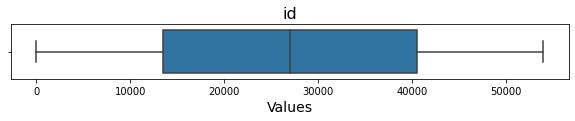

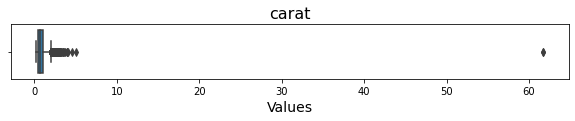

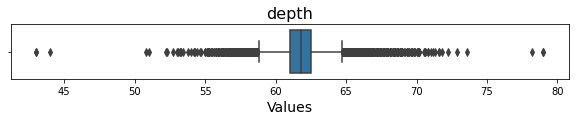

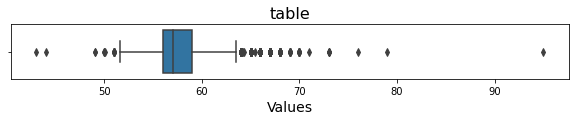

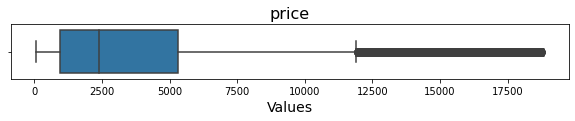

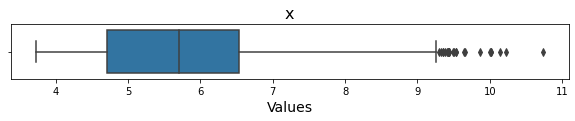

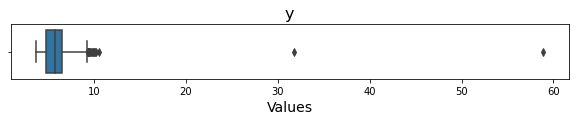

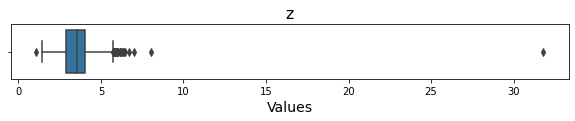

In [ ]:
cols=df2.select_dtypes(['int64','float64'])#Provide the quartile summary along with the count , mean & sum

for col in cols:
  
  print("\nCount of Column '{}' = {}".format(col,len(df2[col])))
  print("\nSum of Column '{}' = {}".format(col,sum(df2[col])))
  plt.figure(figsize=(10,1))
  boxplot=sns.boxplot(data=df2[list(cols)],x=df2[col])
  boxplot.axes.set_title(col, fontsize=16)
  boxplot.set_xlabel("Values", fontsize=14)

  print("\n***********************\n\n")

In [ ]:
#Provide the range, variance and standard deviation
cols=df2.select_dtypes(['int64','float64'])

data=df2[list(cols)]

description=data.describe().transpose()

description['variance']=description['std'].apply(lambda x:x**2)

print(description)

         count          mean  ...           max      variance
id     53940.0  26970.500000  ...  53940.000000  2.424648e+08
carat  53940.0      0.800207  ...     61.749405  3.624312e-01
depth  53940.0     61.749405  ...     79.000000  2.052404e+00
table  53940.0     57.457184  ...     95.000000  4.992948e+00
price  53940.0   3932.546756  ...  18823.000000  1.591559e+07
x      53940.0      5.731805  ...     10.740000  1.253750e+00
y      53940.0      5.735089  ...     58.900000  1.300456e+00
z      53940.0      3.539735  ...     31.800000  4.936274e-01

[8 rows x 9 columns]


Count of Outliers in all columns

************

id          0
carat    1891
depth    2545
table     605
price    3540
x          24
y          22
z          29
dtype: int64
Minimum Value of Outliers in all columns

************

id      -26968.500
carat       -0.560
depth       58.750
table       51.500
price    -5611.625
x            1.965
y            1.990
z            1.215
dtype: float64
Maximum Value of Outliers in all columns

************

id       80909.500
carat        2.000
depth       64.750
table       63.500
price    11885.375
x            9.285
y            9.270
z            5.735
dtype: float64


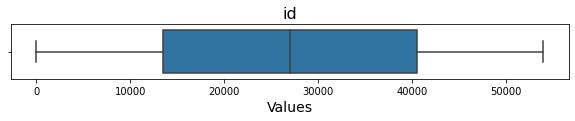

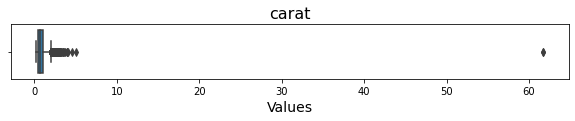

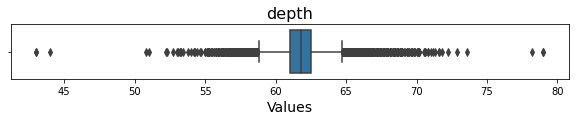

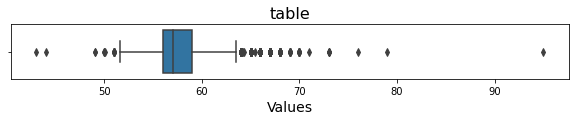

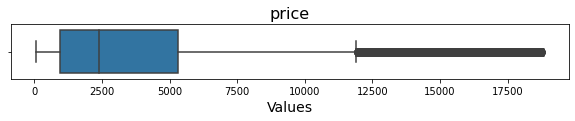

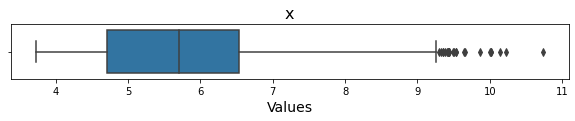

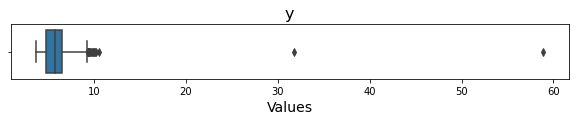

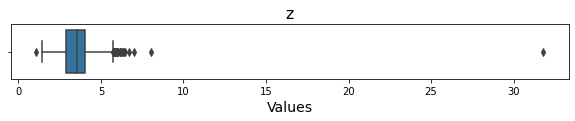

In [ ]:
#Provide the count of outliers and their value. Provide a mechanism to fix the outliers

cols=list(df2.select_dtypes(['int64','float64']))
Q1 = df2[cols].quantile(0.25)
Q3 = df2[cols].quantile(0.75)
IQR = Q3 - Q1
print('Count of Outliers in all columns\n\n************\n')
print(((df2[cols] < (Q1 - 1.5 * IQR)) | (df2[cols] > (Q3 + 1.5 * IQR))).sum())

print('Minimum Value of Outliers in all columns\n\n************\n')
print((Q1 - 1.5 * IQR))

print('Maximum Value of Outliers in all columns\n\n************\n')
print((Q3 + 1.5 * IQR))

# We will use the Capping Mech to handle outliers
df2[cols].where(df2[cols] < (Q1 - 3 * IQR),Q1 - 1.5 * IQR,axis=0)
df2[cols].where(df2[cols] > (Q3 + 3 * IQR),Q3 + 1.5 * IQR,axis=0)

for col in cols:
  
  
  plt.figure(figsize=(10,1))
  boxplot=sns.boxplot(data=df2[list(cols)],x=df2[col])
  boxplot.axes.set_title(col, fontsize=16)
  boxplot.set_xlabel("Values", fontsize=14)

 For each non-numeric column
 
*   Replace null values with suitable statistical value of the
column . Give reason why
*   provide frequency dist ribu tion table the same




In [ ]:
cols=list(set(df2.columns)-set(df2._get_numeric_data().columns))#Replace null values with suitable statistical value of the column . Give reason why
for col in cols:
  mode_val=df2.mode()[col][0]
  for j in range(len(df2[col])):
    if(df2[col].iloc[j]==0):
      df2[col].iloc[j]=mode_val

cols=list(df2.columns)
print("FREQUENCY DISTRIBUTION TABLE FOR ALL COLUMNS \n ***************** \n")#provide frequency dist ribu tion table the same
for col in cols:
  print("\n Column {} \n".format(col))
  print(df2[col].value_counts(),'\n***************')

FREQUENCY DISTRIBUTION TABLE FOR ALL COLUMNS 
 ***************** 


 Column id 

2047     1
6742     1
12947    1
14994    1
8849     1
        ..
17762    1
23905    1
21856    1
44351    1
2049     1
Name: id, Length: 53940, dtype: int64 
***************

 Column carat 

0.30    2604
0.31    2249
1.01    2242
0.70    1980
0.32    1840
        ... 
3.24       1
3.65       1
3.50       1
2.70       1
3.40       1
Name: carat, Length: 274, dtype: int64 
***************

 Column cut 

Ideal        21548
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Unknown          3
Name: cut, dtype: int64 
***************

 Column color 

G                    11292
E                     9797
F                     9542
H                     8303
D                     6775
I                     5421
J                     2807
61.74940489432624        3
Name: color, dtype: int64 
***************

 Column clarity 

B    13065
D    12258
A     9194
C     8172
E     5066
G     3

Provide suitable mechanism to convert non numeric columns to
numeric .

In [ ]:
le=LabelEncoder()
cols=list(set(df2.columns)-set(df2._get_numeric_data().columns))
cols_num=list(df2._get_numeric_data().columns)
for col in cols:
  df2[col]=le.fit_transform(df2[col].astype(str))

print(df2)

          id  carat  cut  color  ...     y     z  nonalpha_cut  nonalpha_clarity
0          1   0.23    2      2  ...  3.98  2.43             0                 0
1          2   0.21    3      2  ...  3.84  2.31             0                 0
2          3   0.23    1      2  ...  4.07  2.31             0                 0
3          4   0.29    3      6  ...  4.23  2.63             0                 0
4          5   0.31    1      7  ...  4.35  2.75             0                 0
...      ...    ...  ...    ...  ...   ...   ...           ...               ...
53935  53936   0.72    2      1  ...  5.76  3.50             0                 0
53936  53937   0.72    1      1  ...  5.75  3.61             0                 0
53937  53938   0.70    5      1  ...  5.68  3.56             0                 0
53938  53939   0.86    3      5  ...  6.12  3.74             0                 0
53939  53940   0.75    2      1  ...  5.87  3.64             0                 0

[53940 rows x 14 columns]


Is re-scaling required . If yes , why and what technique would you
use for rescaling .


Ans:   **In our case, here in this project we are not doing any predictions and hence it is not required to re-scale the columns in our case.
And secondly predictions require implementing Machine Learning Models which we arent doing it here so re-scaling is not required**

Provide histogram for all columns . Provide your interpretation on
the same .


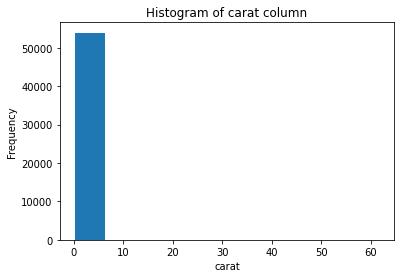

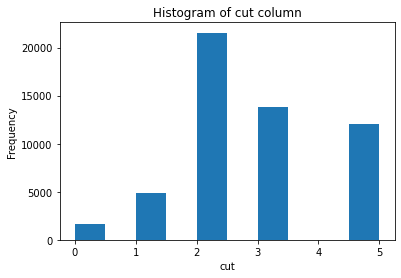

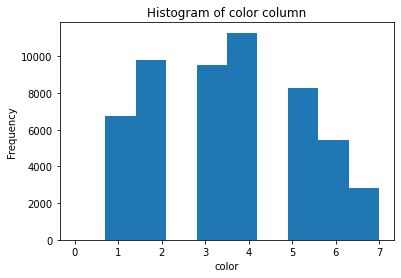

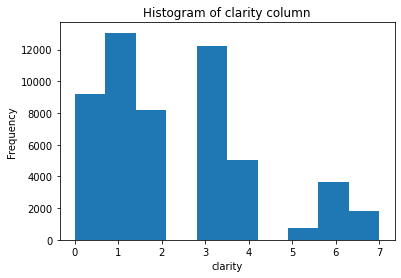

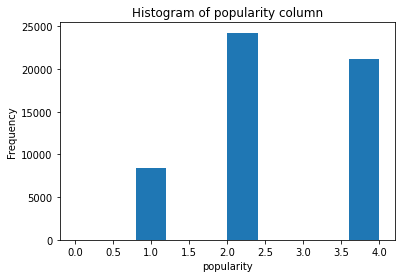

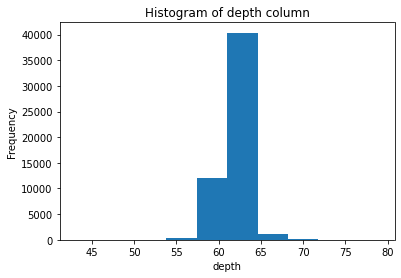

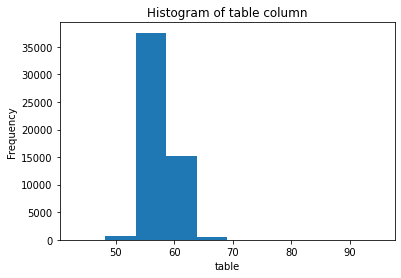

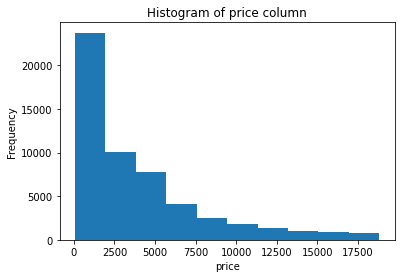

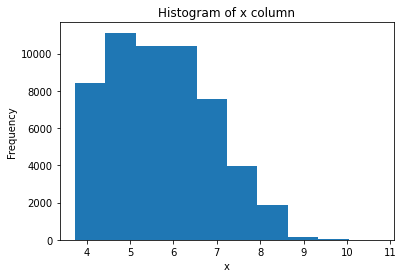

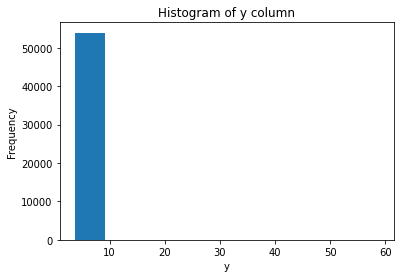

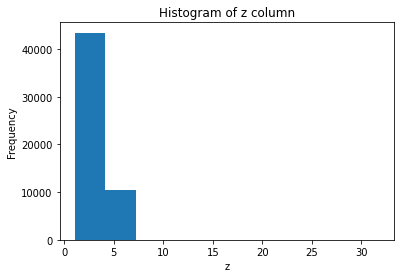

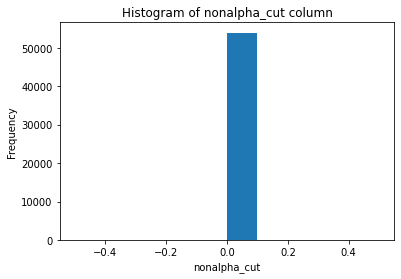

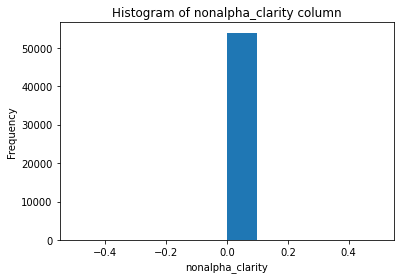

In [ ]:
for col in list(df2.columns):
  if(col=='id'):
    continue
  df2[col].plot(kind='hist')
  plt.xlabel(col)
  plt.title('Histogram of {} column'.format(col))
  plt.show()

Provide box & whisker plots for all columns . Provide your
interpretation on the same .

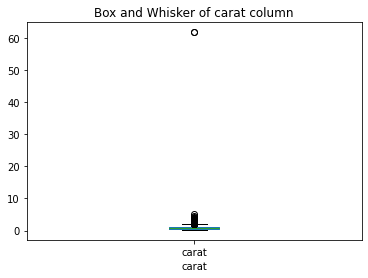

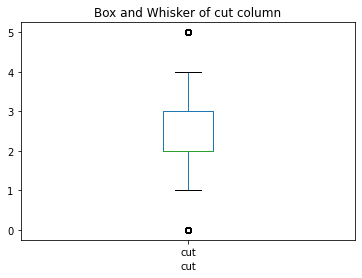

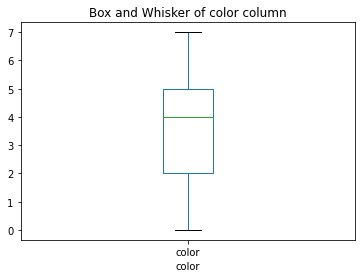

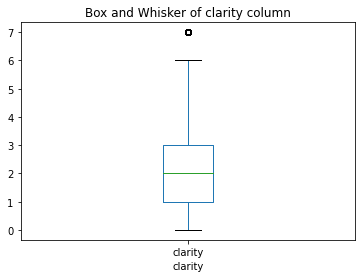

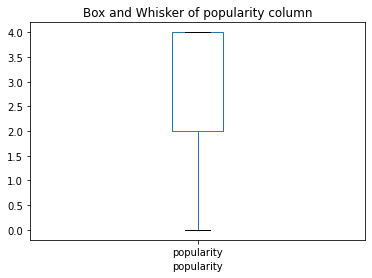

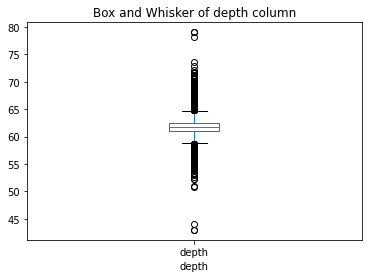

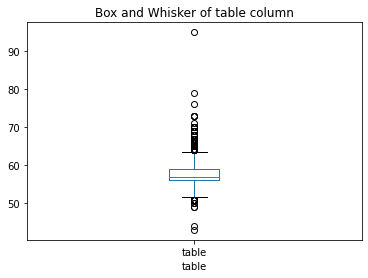

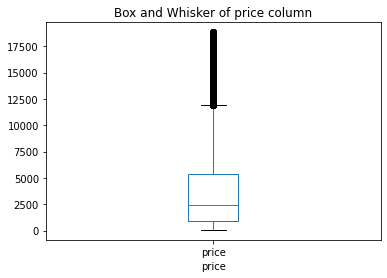

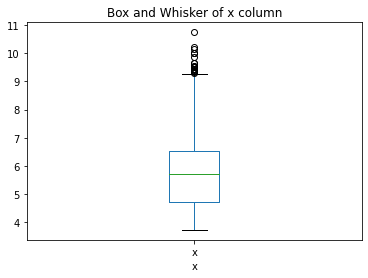

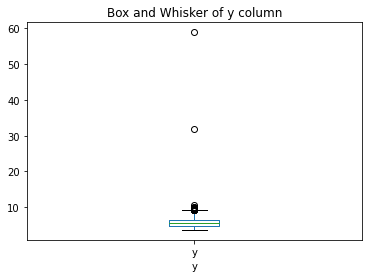

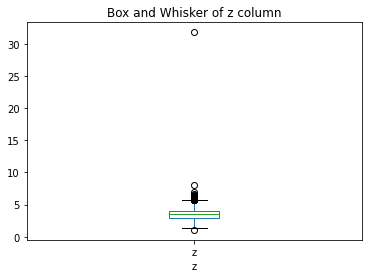

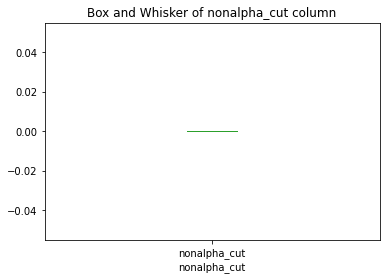

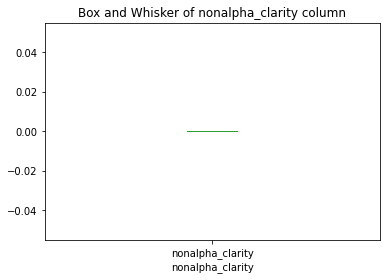

In [ ]:
for col in list(df2.columns):
  if(col=='id'):
    continue
  df2[col].plot.box()
  plt.xlabel(col)
  plt.title('Box and Whisker of {} column'.format(col))
  plt.show()

For numeric columns


1.   provide correlation table
2.  provide a suitable graph to visual the same
3.  State which columns be dropped due to multi -collinearity. Give
reasons .



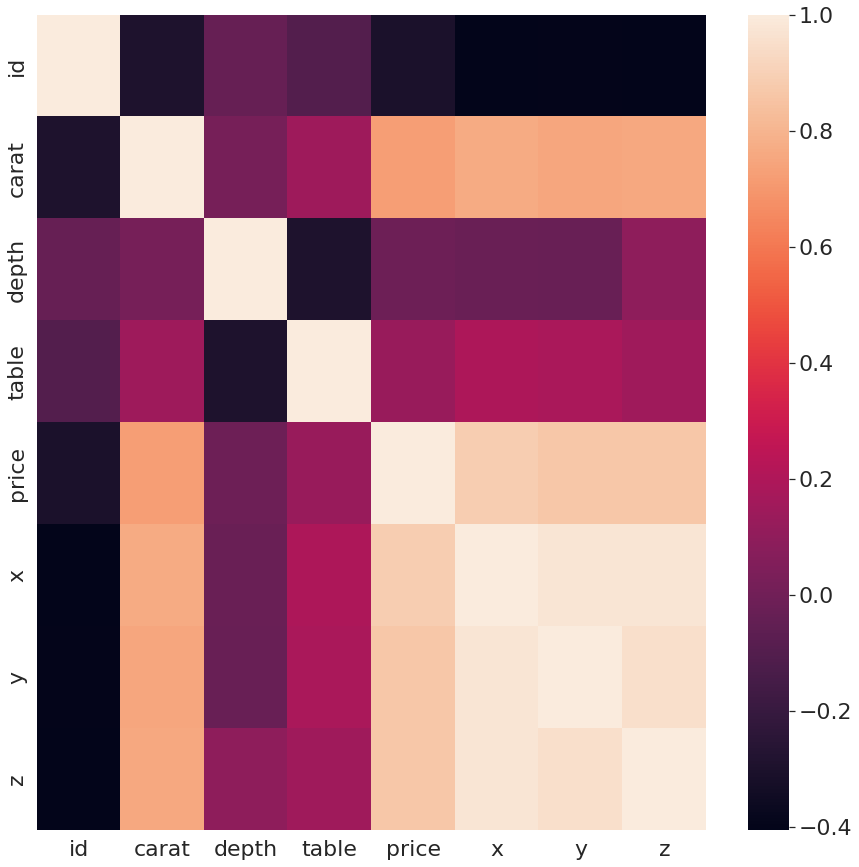

In [ ]:
plt.figure(figsize = (15,15))#correlation table/map
sns.set(font_scale=2)
sns.heatmap(df2[cols_num].corr())



Prepare relation ship chart showing relation of each numeric
column with column “price”. Provide your interpretation on the
same.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


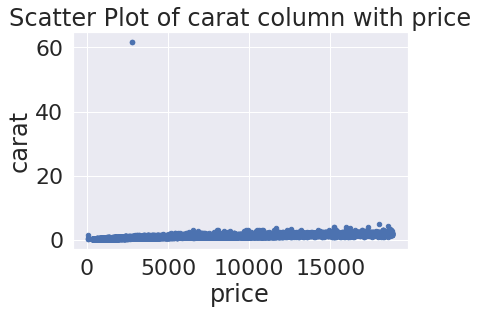

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


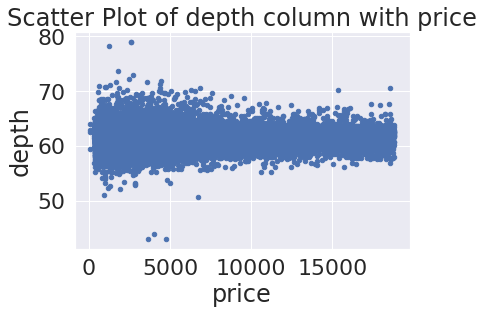

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


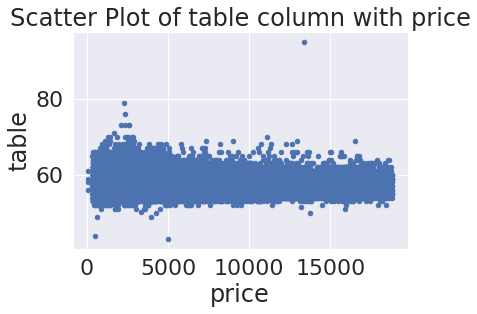

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


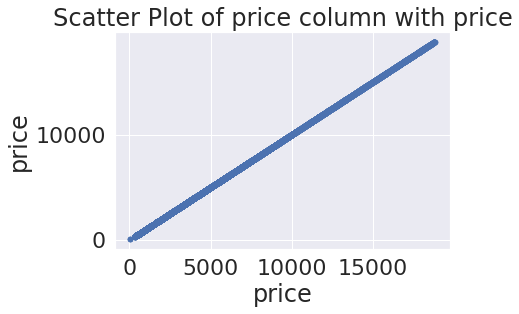

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


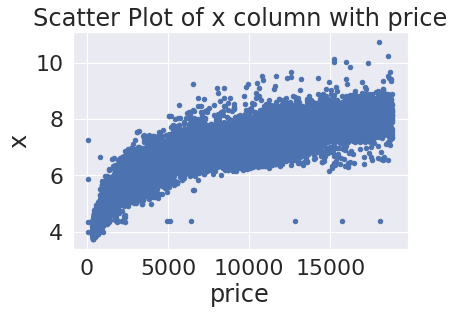

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


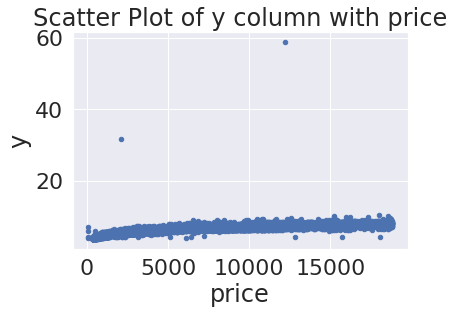

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


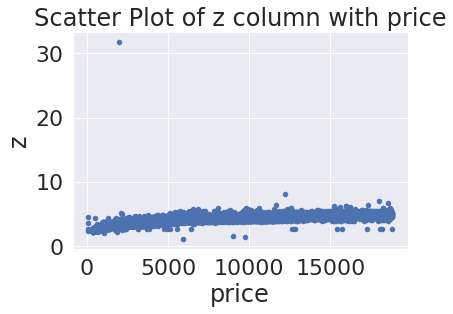

In [ ]:
for col in cols_num:
  if(col=='id'):
    continue

  df2.plot.scatter(x='price', y=col, colormap='jet')
  plt.xlabel('price')
  plt.title('Scatter Plot of {} column with price'.format(col))
  plt.show()



Based on feature selection algorithms , identify significant
columns of the data set . Give proper reason why .


**We will use the corr() matrix to understand which feature to keep which we are going to do**

Refer to formula of “depth” given above , compute a column
“computed depth” based on formula given for each row . Identify
or flag the records for which difference between “ computed
depth” & “depth” is greater than 5% Of “depth” .


In [ ]:
df2['Flag'] = pd.Series()
df2['computed depth'] = pd.Series()
for i in range(len(df2)):
  df2['computed depth'].iloc[i] = (df2['z'].iloc[i]*100)/((df2['x'].iloc[i]+df2['y'].iloc[i])/2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
for i in range(len(df2)):
    df2['Flag'].iloc[i]= 'More than 5%' if  df2['computed depth'][i]-df2['depth'][i]>0.05*df2['depth'][i] else 'Less than 5%'
print(df2['Flag'].value_counts())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Less than 5%    53920
More than 5%       20
Name: Flag, dtype: int64
